In [35]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)

In [36]:
dataFile = sqlContext.read.json("swift://notebooks.spark/AmazonReviews_new.json")
dataFile.count()

28

In [37]:
dataFile.show()

+----------+----------+-------+--------------------+-----------+----------+------------+--------------------+--------------+
|      asin|   helpful|overall|          reviewText| reviewTime|reviewerID|reviewerName|             summary|unixReviewTime|
+----------+----------+-------+--------------------+-----------+----------+------------+--------------------+--------------+
|0000013714|List(1, 3)|    1.0|Worst!! Will neve...|09 13, 2015|         1| J. McDonald|  Hell Highway Hymns|    1252800000|
|0000013714|List(1, 3)|    0.5|Not use it again ...|10 13, 2015|         1| J. McDonald|  Hell Highway Hymns|    1352800000|
|0000013714|List(1, 3)|    1.0|             Worst!!|11 13, 2015|         1| J. McDonald|  Hell Highway Hymns|    1452800000|
|0000013714|List(1, 3)|    0.5|Worst product eve...|12 13, 2015|         1| J. McDonald|  Hell Highway Hymns|    1552800000|
|0000013714|List(1, 3)|    1.5|          Really Bad|09 13, 2015|         2|   J. Bakshi|     Hell Using This|    1252800000|


In [38]:
dataFile.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)



In [49]:
dataFile
dataFile.registerTempTable("User_Reviews")

In [50]:
df = sqlContext.sql("select reviewerID, reviewerName, reviewText, overall, reviewTime from User_Reviews where overall <=1.5")
df.show()

+----------+------------+--------------------+-------+-----------+
|reviewerID|reviewerName|          reviewText|overall| reviewTime|
+----------+------------+--------------------+-------+-----------+
|         1| J. McDonald|Worst!! Will neve...|    1.0|09 13, 2015|
|         1| J. McDonald|Not use it again ...|    0.5|10 13, 2015|
|         1| J. McDonald|             Worst!!|    1.0|11 13, 2015|
|         1| J. McDonald|Worst product eve...|    0.5|12 13, 2015|
|         2|   J. Bakshi|          Really Bad|    1.5|09 13, 2015|
|         2|   J. Bakshi|                 Bad|    1.5|09 14, 2015|
|         2|   J. Bakshi|          Really Bad|    1.5|09 13, 2015|
|         2|   J. Bakshi|                 Bad|    1.5|09 14, 2015|
|         2|   J. Bakshi|          Really Bad|    1.5|09 14, 2015|
|         2|   J. Bakshi|                 Bad|    1.5|09 14, 2015|
+----------+------------+--------------------+-------+-----------+



In [51]:
df = sqlContext.sql("select reviewerID from User_Reviews where overall <=1.5")
df.show()

+----------+
|reviewerID|
+----------+
|         1|
|         1|
|         1|
|         1|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
+----------+



In [52]:
df = sqlContext.sql("select reviewerID, asin as productid, overall from  User_Reviews where overall <=1.5 group by reviewerID, asin , overall")
df.show()

+----------+----------+-------+
|reviewerID| productid|overall|
+----------+----------+-------+
|         1|0000013714|    1.0|
|         1|0000013714|    0.5|
|         2|0000013714|    1.5|
|         2|0000013715|    1.5|
|         2|0000013716|    1.5|
+----------+----------+-------+



In [54]:
df = sqlContext.sql("select count(*) as totalpersons , reviewText from User_Reviews group by reviewText")
df.show()

+------------+--------------------+
|totalpersons|          reviewText|
+------------+--------------------+
|           2|           excellent|
|           1|Not use it again ...|
|           3|                 Bad|
|           1|Worst!! Will neve...|
|           3|          Really Bad|
|           1|Worst product eve...|
|           2|                null|
|           9|                good|
|           1|             Worst!!|
|           5|           very good|
+------------+--------------------+



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib2
pd.__version__
%matplotlib inline

pd.pdf_name=df.toPandas()

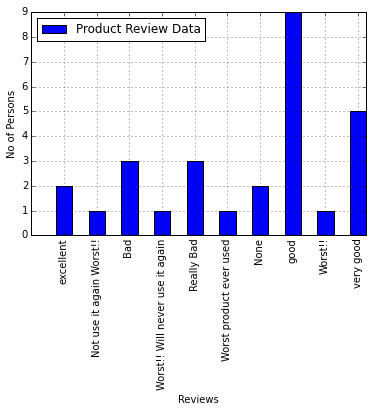

In [56]:
name_list=pd.pdf_name['reviewText'].head(15).tolist()
name_amounts=pd.pdf_name['totalpersons'].head(15).tolist()
data_names = {'Product Review Data':pd.Series(name_amounts, index=name_list)}
df_name_plot = pd.DataFrame(data_names)
ax = df_name_plot.plot(kind='bar')
ax.set_xlabel("Reviews")
ax.set_ylabel("No of Persons")